In [1]:
import cv2
import dlib
import numpy as np

ModuleNotFoundError: No module named 'cv2'

In [2]:
from scipy.spatial import distance
from matplotlib import pyplot as plt

ModuleNotFoundError: No module named 'scipy'

In [57]:
font = cv2.FONT_HERSHEY_SIMPLEX
# org
org = (50, 50)
# fontScale
fontScale = 1
# Blue color in BGR
color = (255, 0, 0)
# Line thickness of 2 px
thickness = 2

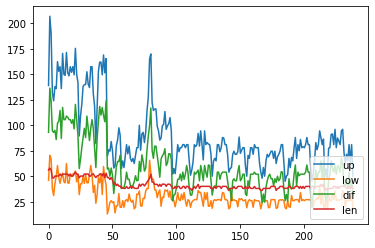

In [134]:
#cap = cv2.VideoCapture("ALLmanHappines.mp4")
cap = cv2.VideoCapture(0)

hog_face_detector = dlib.get_frontal_face_detector()

dlib_facelandmark = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

dis_list=[]

up_A=[]
l_A=[]
bl_dif=[]
up_slope=[0]
dn_slope=[0]

len_rel=[]

blink_count=0
blink_chk=False

while True:
    _, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    gray = clahe.apply(gray)

    faces = hog_face_detector(gray)
    for face in faces:

        face_landmarks = dlib_facelandmark(gray, face)
            
        #For blink detection
        cnt,up_area=area_pol([36,37,38,39,40,41],face_landmarks)
        frame=cv2.drawContours(frame,[cnt],-1,(0,255,0),1)
        cnt,low_area=area_pol([36,39,40,41],face_landmarks)
        frame=cv2.drawContours(frame,[cnt],-1,(0,0,255),1)
        
        
        up_A.append(up_area)
        l_A.append(low_area)
        bl_dif.append(up_area-low_area)
        
        up_slope.append(up_area-up_slope[-1])
        perimeter = cv2.arcLength(area_pol([36,39],face_landmarks)[0],True)
        len_rel.append(perimeter)

        #Robust Blink detection Algorithm
        if (up_area-low_area)<perimeter:
            #print("Blink")#Spoofing based on photo mask or image is avoided
            frame = cv2.putText(frame, "blinked", (100,100), font, fontScale, color, thickness, cv2.LINE_AA)
        



    #frame=Draw_MyLM(frame,face_landmarks)
    cv2.imshow("Face Landmarks", frame)
    

    if cv2.waitKey(1) & 0xFF==ord("q"):
        break
cap.release()
cv2.destroyAllWindows()

plt.plot(up_A)
plt.plot(l_A)
plt.plot(bl_dif)
plt.plot(np.array(len_rel))

plt.legend(["up", "low","dif","len"], loc ="lower right")


In [26]:
#Background subtraction

cap = cv2.VideoCapture(0)
bgs=cv2.createBackgroundSubtractorMOG2()

while True:
    _, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    gray=bgs.apply(gray)


    #frame=Draw_MyLM(frame,face_landmarks)
    cv2.imshow("Face Landmarks", gray)

    if cv2.waitKey(1) & 0xFF==ord("q"):
        break
cap.release()
cv2.destroyAllWindows()

In [98]:
def area_pol(point_list,face_landmarks):
    '''Assuming the list of tuples passed into the argument
    Calulates  are of polyogon'''
    contour=np.array([[face_landmarks.part(num).x,face_landmarks.part(num).y] for num in point_list],dtype=np.int32)
    area=cv2.contourArea(contour)
    return contour,area
    